## Minimax Tree and Alpha-Beta Pruning Algorithm


## Tree Structure Abstraction
We will implement the minimax algorithm over a tree. The tree will have nodes that branch out, and it will have leaves with fixed values. Our job is to implement an algorithm that traverses the tree and figures out which moves will be played out.

We use the following classes to represent the tree structure:

In [ ]:
class Tree:
    def __init__(self, children):
        self.children = children

    def __str__(self):
        return f"Tree({', '.join(str(sub) for sub in self.children)})"

class Leaf(Tree):
    def __init__(self, value):
        super().__init__([])
        self.value = value

    def __str__(self):
        return f"T({self.value})"

With these two classes, we can build a tree like the following:

In [ ]:
tree = Tree([
    Tree([
        Tree([
            Leaf(3),
            Leaf(4),
        ]),
        Tree([
            Leaf(8),
            Tree([
                Leaf(-2),
                Leaf(10),
            ]),
            Leaf(5),
        ])
    ]),
    Leaf(7),
])

This corresponds to the following tree:
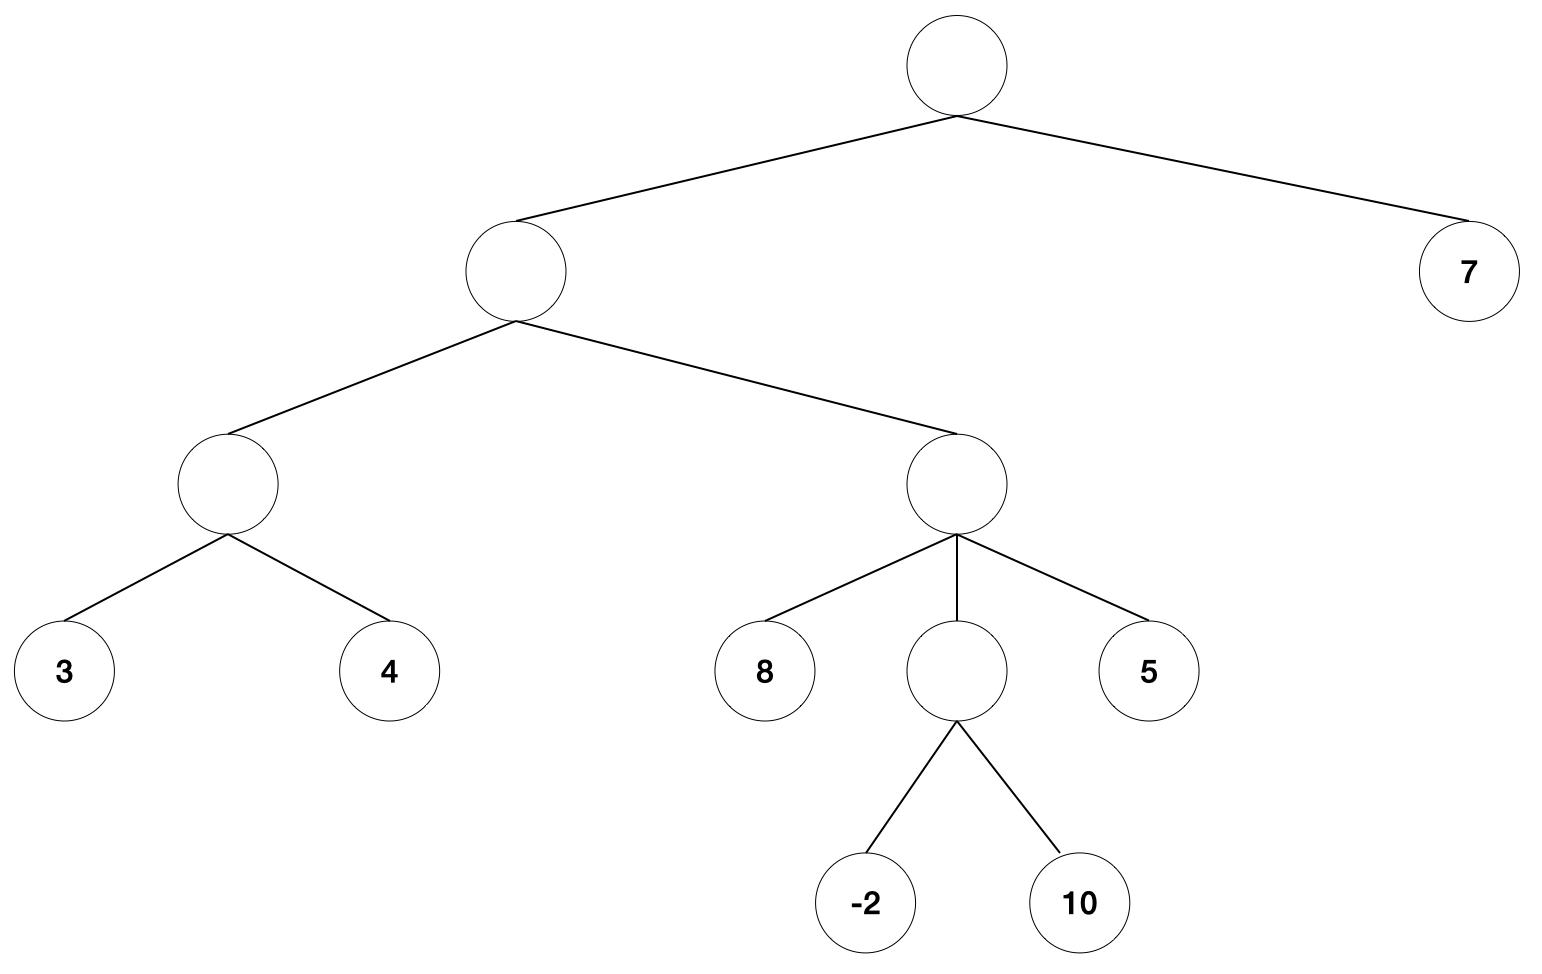

In [ ]:
for subtree in tree.children:
  print(subtree)

Tree(Tree(T(3), T(4)), Tree(T(8), Tree(T(-2), T(10)), T(5)))
T(7)



We can use the function isinstance() to see whether an object is an instance of a certain class. For example,

In [ ]:
print(len(tree.children))
The tree we defined above is an instance of Tree class, but NOT Leaf class.
print(isinstance(tree, Tree))
print(isinstance(tree, Leaf))
The second subtree of tree, i.e., T(7), is an instance of Tree class, as well as Leaf class.
print(tree.children[0],"is instance=",isinstance(tree.children[1], Tree))
print(isinstance(tree.children[1], Leaf))

2
True
False
Tree(Tree(T(3), T(4)), Tree(T(8), Tree(T(-2), T(10)), T(5))) is instance= True
True




Recall the minimax. As two players go down the tree, they switch back and forth each turn. The objective of the algorithm also switches:

- When it's the maximizer's turn, the algorithm tries to maximize the scores;
- When it's the minimizer's turn, the algorithm tries to minimize the scores.

Then the algorithm should do the following:

- If the current node has children (which means the player has multiple choices), the algorithm evaluates the choices and picks the preferred one;
- If the current node is a leaf, the algorithm reaches a terminal state and returns its value.


In [ ]:
# TODO
def minimax(tree, player):

  
  score =0
  if tree.children==[]:
    return tree.value
  if player=="max":
    score=float("-inf")
    size=len(tree.children)
    if (size==1):
      score=tree.children[0]
    else:
      for i in range(size-1):
        score=max(minimax(tree.children[i],"min"),minimax(tree.children[i+1],"min"))

  if player=="min":
    score=float("+inf")
    size=int(len(tree.children))

    if (size==1):
      score=tree.children[0]
    else:
      for i in range(size-1):
        score=min(minimax(tree.children[i],"max"),minimax(tree.children[i+1],"max"))
  return score





In [ ]:
print(minimax(tree, 'max')) #7
print(minimax(tree, 'min')) #5

7
5


e default values of $-\infty$ and $+\infty$, respectively. In the *alpha_beta_pruning* function below, we still return the minimax value of the algorithm, which is the same as the *minimax* function. But we also add a *print(tree)* statement at the top of the algorithm. By doing this,  we can see which nodes are visited by the algorithm.

In [ ]:
# TODO
def alpha_beta_pruning(tree, player, alpha=float("-inf"), beta=float("+inf")):
  print(tree)   # do not delete this line in your submission
  ### Write your code below

  if tree.children==[]:
    return tree.value

  if player=="max":
    size=len(tree.children)
    for i in range(size):
      alpha=max(alpha,alpha_beta_pruning(tree.children[i], "min",alpha,beta))
      if(alpha>=beta):
        break
    return alpha
  

  if player=="min":
    size=len(tree.children)
    for i in range(size):
      beta=min(beta,alpha_beta_pruning(tree.children[i], "max",alpha,beta))
      if(alpha>=beta):
        break
    return beta
    




  ### End of your code

You can test your alpha-beta pruning by the above tree example. The printed visiting trajectory should be:

Tree(Tree(Tree(T(3), T(4)), Tree(T(8), Tree(T(-2), T(10)), T(5))), T(7))

Tree(Tree(T(3), T(4)), Tree(T(8), Tree(T(-2), T(10)), T(5)))

Tree(T(3), T(4))

T(3)

T(4)

Tree(T(8), Tree(T(-2), T(10)), T(5))

T(8)

T(7)

In [ ]:

val = alpha_beta_pruning(tree, 'max')

Tree(Tree(Tree(T(3), T(4)), Tree(T(8), Tree(T(-2), T(10)), T(5))), T(7))
Tree(Tree(T(3), T(4)), Tree(T(8), Tree(T(-2), T(10)), T(5)))
Tree(T(3), T(4))
T(3)
T(4)
Tree(T(8), Tree(T(-2), T(10)), T(5))
T(8)
T(7)


In the output, each line corresponds to a recursive call. The leaves T(-2), T(10), and T(5) are never visited. The subtree Tree(T(-2), T(5)) is not visited either because they have been pruned.

## Another Test Tree Example
Except the above tree, another tree example is provided for you to test your algorithms.

In [ ]:
tree_2 = Tree([
    Tree([
        Leaf(9),
        Leaf(5),
    ]),
    Tree([
        Leaf(-3),
        Leaf(-2),
    ])
])

The returned value of *minimax* should be 5 and -2 for the code cell below.

In [ ]:
# ### Please comment out this code cell in your submission.

# print(minimax(tree_2, 'max'))
# print(minimax(tree_2, 'min'))

5
-2


The printed visiting trajectory of *alpha_beta_pruning* should be:

Tree(Tree(T(9), T(5)), Tree(T(-3), T(-2)))

Tree(T(9), T(5))

T(9)

T(5)

Tree(T(-3), T(-2))

T(-3)

In [ ]:
# ### Please comment out this code cell in your submission.

# val_2 = alpha_beta_pruning(tree_2, 'max')

In [ ]:
# tree_task=Tree([
#     Tree([
#         Tree([
#             Leaf(4), Leaf(3)]), 
#         Tree([Leaf(3), Leaf(2)])
#     ]),
#     Tree([
#         Tree([
#             Leaf(2), Leaf(1)])
#         , Tree([Leaf(9), Leaf(5)])
#         , Tree([Leaf(3), Leaf(1)])
#         ]), 
#         Tree([
#             Tree([
#                 Leaf(5), Leaf(4)])
#             , Tree([Leaf(7), Leaf(5)])
#             ])
#         ])


In [ ]:
# val_3 = alpha_beta_pruning(tree_task, 'max')

Tree(Tree(Tree(T(4), T(3)), Tree(T(3), T(2))), Tree(Tree(T(2), T(1)), Tree(T(9), T(5)), Tree(T(3), T(1))), Tree(Tree(T(5), T(4)), Tree(T(7), T(5))))
Tree(Tree(T(4), T(3)), Tree(T(3), T(2)))
Tree(T(4), T(3))
T(4)
T(3)
Tree(T(3), T(2))
T(3)
T(2)
Tree(Tree(T(2), T(1)), Tree(T(9), T(5)), Tree(T(3), T(1)))
Tree(T(2), T(1))
T(2)
T(1)
Tree(Tree(T(5), T(4)), Tree(T(7), T(5)))
Tree(T(5), T(4))
T(5)
T(4)
Tree(T(7), T(5))
T(7)


 Tree(Tree(Tree(T(4), T(3)), Tree(T(3), T(2))), Tree(Tree(T(2), T(1)), Tree(T(9 , T(5)), Tree(T(3), T(1))), Tree(Tree(T(5), T(4)), Tree(T(7), T(5)))) <br>
Tree(Tree(T(4), T(3)), Tree(T(3), T(2)))
Tree(T(4), T(3)) <br>
T(4) <br>
 T(3) <br>
 Tree(T(3), T(2))<br>
 T(3)<br>
 T(2)<br>
 Tree(Tree(T(2), T(1)), Tree(T(9), T(5)), Tree(T(3), T(1)))<br>
 Tree(T(2), T(1))<br>
 T(2)<br>
 T(1)<br>
 Tree(Tree(T(5), T(4)), Tree(T(7), T(5)))<br>
 Tree(T(5), T(4))<br>
 T(5)<br>


## Next Steps
The above implementations can be used as basic algorithms for AI to play games against humans. That requires implementing a game, defining the "players", "moves", "scores", and "winning/losing", and then creating an abstraction that allows the alpha-beta pruning algorithm to work. We leave that as an optional task and hope this lab can help you to build more interesting AI algorithms in the future!